In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# PATHs (edit these paths depending on dataset)
dataset = 'detailed'

# training data
inputs_path = 'training_data/' + dataset + '/inputs.csv'
outputs_path = 'training_data/' + dataset + '/outputs.csv'
evaluation_path = 'training_data/' + dataset + '/evaluation.csv'

# raw dfs
inputs_df = pd.read_csv(inputs_path)
outputs_df = pd.read_csv(outputs_path)
evaluation_df = pd.read_csv(evaluation_path)

# fold dfs
fold_size = int(inputs_df.shape[0]/2)
inputs_fold1_df = inputs_df[0:fold_size]
inputs_fold2_df = inputs_df[fold_size:]
outputs_fold1_df = outputs_df[0:fold_size]
outputs_fold2_df = outputs_df[fold_size:]
evaluation_fold1_df = evaluation_df[evaluation_df['sequenceID'].isin(inputs_fold1_df['sequenceID'])]
evaluation_fold2_df = evaluation_df[evaluation_df['sequenceID'].isin(inputs_fold2_df['sequenceID'])]

# feature engineering transformation
identity = lambda x: x
log      = lambda x: np.log(x)
loglog   = lambda x: np.log(np.log(x))

In [3]:
def plot_input_output(inputs_df, chosen_features, feature_engineer, outputs_df):
    # Sample data
    for feature, transform in zip(chosen_features, feature_engineer):
        x = inputs_df[feature].to_numpy()
        x = transform(x)
        y_start = outputs_df['min.log.lambda'].to_numpy()
        y_end = outputs_df['max.log.lambda'].to_numpy()

        # Plot vertical segments
        for i in range(len(x)):
            plt.plot([x[i], x[i]], [y_start[i], y_end[i]], color='blue')
        
        # scatter
        plt.scatter(x, y_start, color='r')
        plt.scatter(x, y_end, color = 'b')

        # Set labels and title
        plt.xlabel(feature)
        plt.ylabel('target')

        # Show plot
        plt.grid(True)
        plt.show()

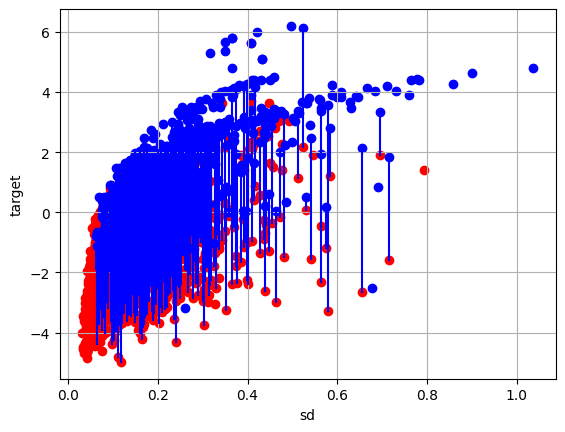

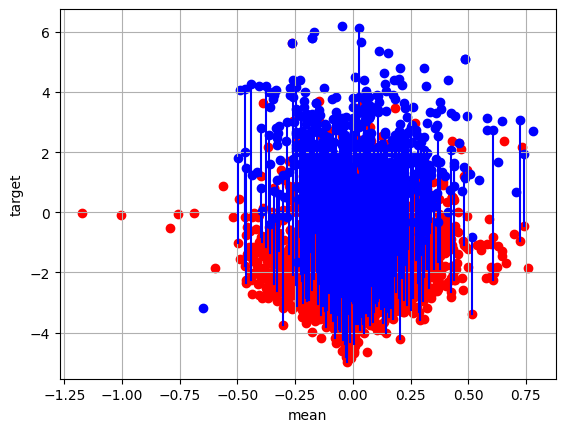

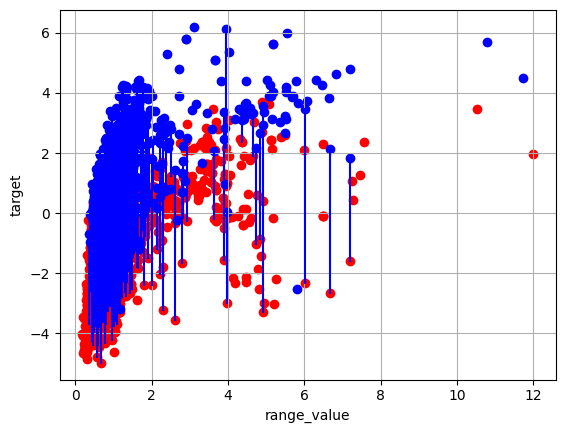

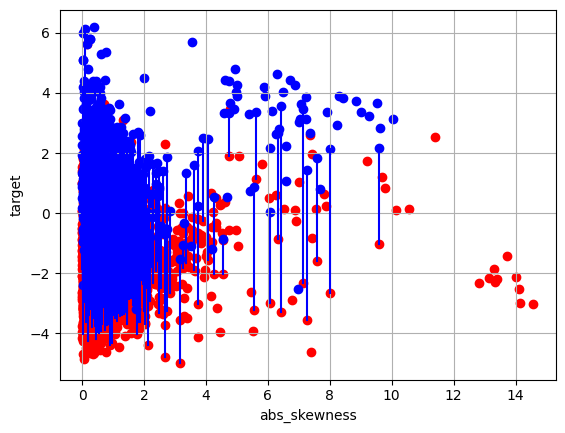

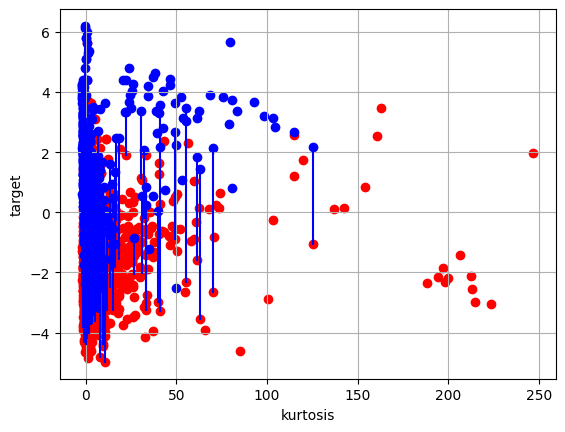

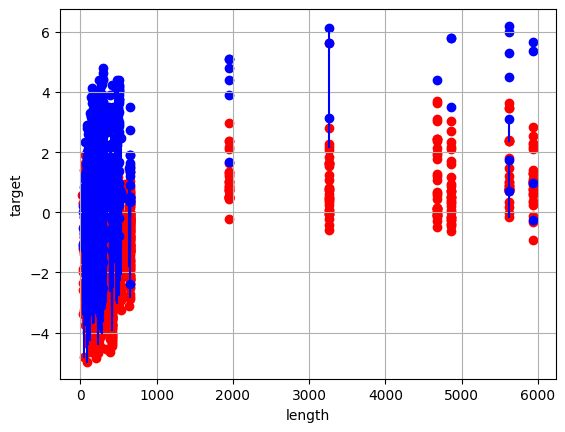

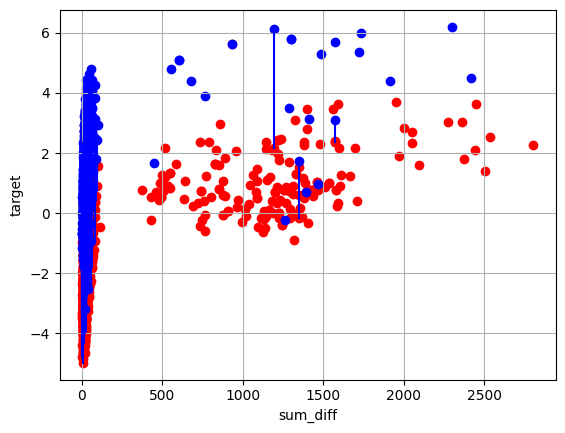

In [4]:
plot_input_output(inputs_df, 
                  ['sd',     'mean',   'range_value', 'abs_skewness', 'kurtosis', 'length', 'sum_diff'], 
                  [identity, identity, identity,      identity,       identity,   identity, identity], 
                  outputs_df)

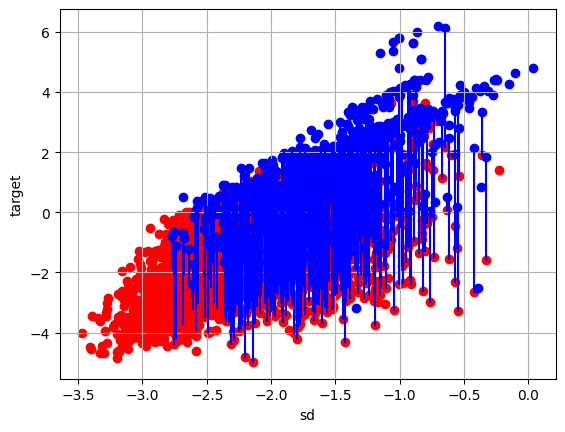

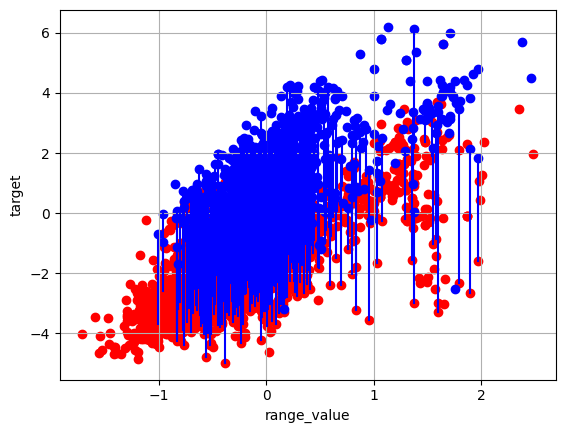

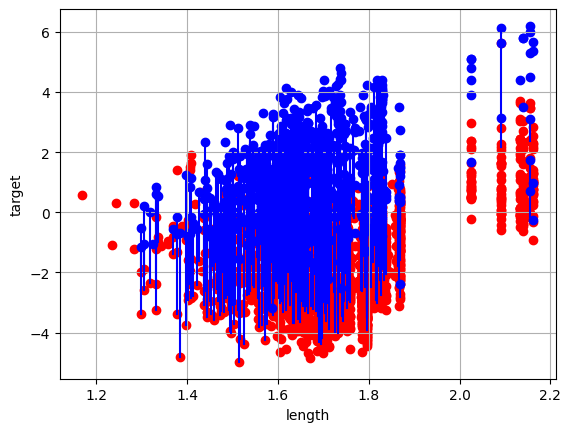

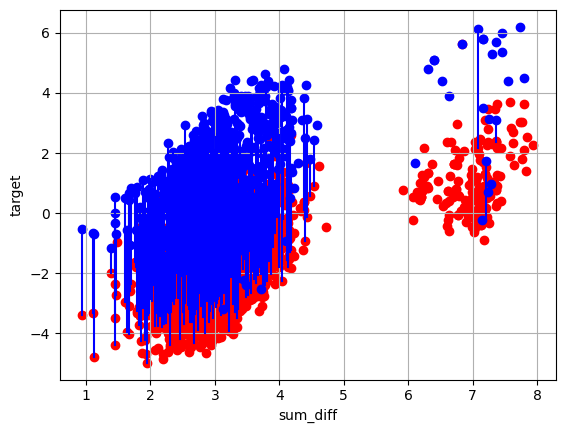

In [5]:
plot_input_output(inputs_df, 
                  ['sd', 'range_value', 'length', 'sum_diff'], 
                  [log,  log,           loglog,   log], 
                  outputs_df)